In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [5]:
train=pd.read_csv('./data/titanic_train.csv')

## Quick overview

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis (EDA)

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


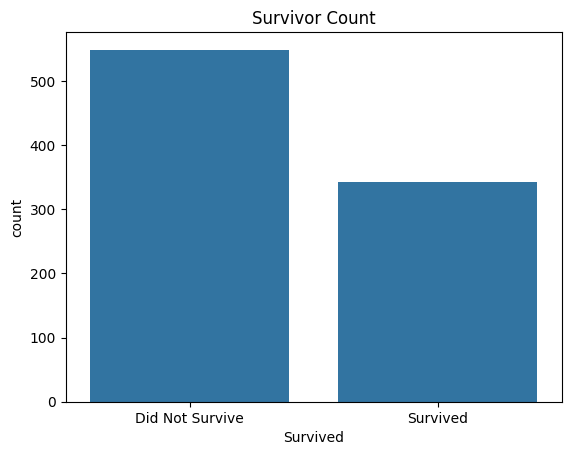

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Survived', data=train)
plt.title("Survivor Count")
plt.xticks([0,1], ['Did Not Survive', 'Survived'])
plt.show()


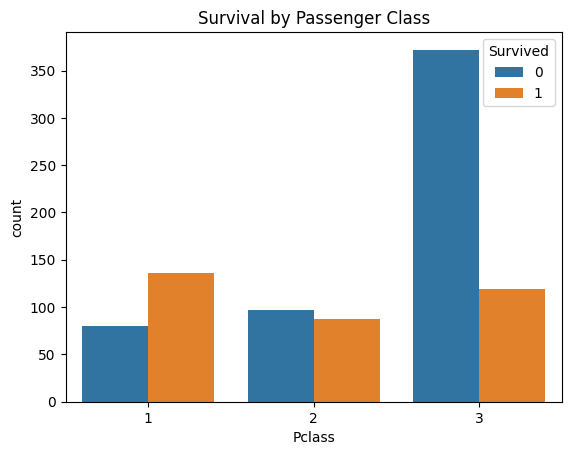

In [104]:
# Survival by Pclass
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title("Survival by Passenger Class")
plt.show()

## Check for Missing Values

In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We see that Age has 177 missing entries, Cabin has 687 missing entries, and Embarked has 2 missing entries. To handle them, we can fill Age with the median, fill Embarked with the most common value (mode), and drop the Cabin column since most of its values are missing.

## Data Preprocessing
Before training a machine learning model, we need to clean and prepare the data. This involves handling missing values, converting categorical features into numbers, and creating new features that can help the model.

## Handle Missing Values
- Age: Fill with median because age has outliers.

- Embarked: Fill with mode (most common value) because it’s categorical.

- Cabin: Drop it because most values are missing.

- Ticket: Can drop, not very useful.

In [ ]:
train = train.drop('Cabin', axis=1)
train['Age']=train['Age'].fillna(train['Age'].median())
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0])

## Encode Categorical Features
Machine learning models need numbers, not words. So we convert categorical columns like Sex and Embarked into numbers.

In [16]:
train['Sex']=train['Sex'].map({'male':0, 'female':1})
train['Embarked'] = train['Embarked'].map({'C':0, 'Q':1, 'S':2})
train = train.drop('Ticket', axis=1)

## Feature Engineering
Now you can create new useful features from existing columns:

In [ ]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train['Title'] 

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\HP\AppData\Local\Temp\ipykernel_10024\905276870.py:2: SyntaxWarning: invalid escape sequence '\.'
  train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [19]:
# Simplify titles (rare ones grouped as 'Other')
train['Title'] = train['Title'].replace(
    ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],
    'Other'
)
train['Title'] 

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886    Other
887     Miss
888     Miss
889       Mr
890       Mr
Name: Title, Length: 891, dtype: object

In [ ]:
# Makes the dataset cleaner by merging similar titles (e.g., Mlle → Miss, Mme → Mrs).
train['Title'] = train['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'})


In [21]:
# Encode titles into numbers
train['Title'] = train['Title'].map({'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Other':4})


## Create Age Groups (bins)

Splits passengers into age groups:

0 = Child (0–12)

1 = Teen (13–18)

2 = Young Adult (19–35)

3 = Adult (36–60)

4 = Senior (61+)

This helps the model spot survival trends by age category.

In [44]:
# Create Age Groups (bins)
train['AgeGroup'] = pd.cut(train['Age'], bins=[0,12,18,35,60,100], labels=[0,1,2,3,4])
train['AgeGroup'] = train['AgeGroup'].astype(int)


In [45]:
# Create FamilySize feature
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1


After this, your dataset has extra useful features:

Title (Mr, Mrs, Miss, etc.)

AgeGroup (Child, Teen, Adult…)

FamilySize

In [46]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2,0,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0,2,3,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2,1,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2,2,2,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,2,4,2,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,2,1,2,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,23.4500,2,1,2,4
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,0,0,2,1


# Split Features and Target
We train the model on X_train and test it on X_test to check how it performs on unseen data.

In [47]:
X_train=train.drop(['Survived','Name'], axis=1)
y_train=train['Survived']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [97]:
# View the different shapes of the training and test datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712,), (179,))

In [98]:
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)
print("Training accuracy:", train_score)
print("Test accuracy:", test_score)


Training accuracy: 0.8525280898876404
Test accuracy: 0.8156424581005587


## Model Building

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [51]:
# put models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

#empty dictionary to store results
results = {}
X_train.columns


Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'AgeGroup', 'FamilySize'],
      dtype='object')

In [64]:
# Loop through the models dictionary items, fitting the model on the training data
# and appending the model name and model score on the test data to the results dictionary
for model_name, model in models.items():
    model.fit(X_train,y_train)
    results[model_name] = model.score(X_test,y_test)

# View the results
results

c:\Users\HP\Desktop\TheAIEngineers\Predicting-Titanic-Survivors\titanic\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\HP\Desktop\TheAIEngineers\Predicting-Titanic-Survivors\titanic\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:09:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


{'Logistic Regression': 0.7877094972067039,
 'Random Forest': 0.8547486033519553,
 'XGBoost': 0.7877094972067039}

Due to the randomness of how models like Random Forest or XGBoost find patterns in the data, the results can vary slightly each time you run the code.

Without setting a random state (like random_state in some models) or a NumPy random seed, every run can produce slightly different results. Setting a seed ensures reproducibility.

Example: Running the same code with a NumPy random seed of 42 will give consistent results every time:

In [71]:
import numpy as np
np.random.seed(42)

results = {}
for model_name, model in models.items():
    model.fit(X_train,y_train)
    results[model_name] = model.score(X_test,y_test)

# View the results
results

c:\Users\HP\Desktop\TheAIEngineers\Predicting-Titanic-Survivors\titanic\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\HP\Desktop\TheAIEngineers\Predicting-Titanic-Survivors\titanic\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:24:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


{'Logistic Regression': 0.7877094972067039,
 'Random Forest': 0.8435754189944135,
 'XGBoost': 0.7877094972067039}

Let's make our results a little more visual.

<Axes: >

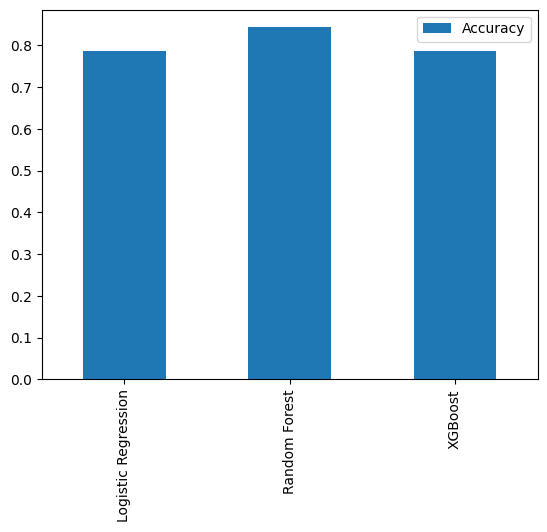

In [72]:
results_df=pd.DataFrame(results.values(),
                        results.keys(),
                        columns=['Accuracy'])
results_df.plot.bar()

# Identify the Best

The higher the score, the better the model is performing on the test data.

Here, Random Forest has the highest score (0.844), so it is performing the best among the three.

## Evaluating the Best Model

After choosing the best model (here, Random Forest), we want to see how well it performs using different metrics.

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay

best_model = models['Random Forest']

# Make predictions on the test set
y_pred=best_model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

In [74]:
# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[92, 13],
       [15, 59]])

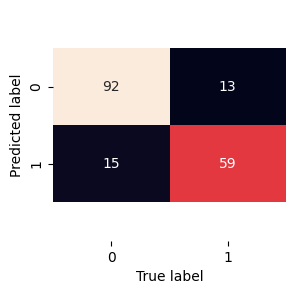

In [76]:
# Make it more visual
# Import seaborn for improving visualisation of confusion matrix
import seaborn as sns

# Make confusion matrix more visual
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    # Fix the broken annotations (this happened in Matplotlib 3.1.1)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5);
    
plot_conf_mat(y_test, y_pred)

In [78]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       105
           1       0.82      0.80      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179



The classification report gives us a range of values for precision, recall and F1 score, time to find these metrics using Scikit-Learn functions.

In [79]:
# Find the precision score of the model using precision_score()
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.8194444444444444

In [80]:
# Find the recall score
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.7972972972972973

In [81]:
# Find the F1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.8082191780821918

# Roc Curve

A ROC curve (Receiver Operating Characteristic curve) is a graph that shows how well your model distinguishes between the classes.

X-axis: False Positive Rate (FPR) → mistakes the model makes

Y-axis: True Positive Rate (TPR) → correct predictions of the positive class

Goal: The closer the curve is to the top-left corner, the better your model is at separating the classes.

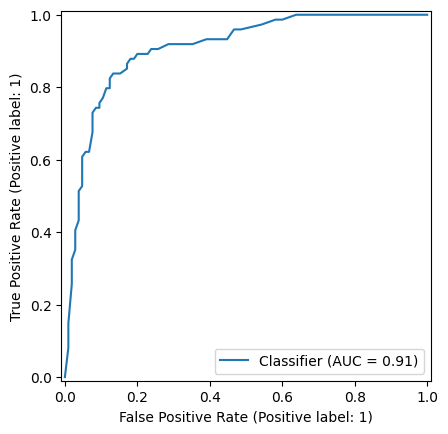

In [86]:
# Get predicted probabilities for the positive class (Survived=1)
y_probs=best_model.predict_proba(X_test)[:, 1]
RocCurveDisplay.from_predictions(y_test, y_probs)

## Hyperparameter Tuning using GridSearchCV
Hyperparameter tuning is the process of finding the best combination of settings for a model (like number of trees in Random Forest or tree depth) to improve its performance. Instead of using default settings, we systematically test combinations of parameters to find the ones that give the highest accuracy. Here, we use GridSearchCV, which tries all combinations of specified parameters using cross-validation.

In [92]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for RandomForestClassifier
param_grid = {'n_estimators': [100, 200, 300],
                'max_depth': [None, 5, 10],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]}

# GridSearchCV Object to find the best hyperparameters
grid_search= GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    cv=5, # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1, # Use all available cores
    verbose=1 
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
#View best hyperparameters 
grid_search.best_params_




Fitting 5 folds for each of 81 candidates, totalling 405 fits


{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [93]:
#View the best score
grid_search.best_score_


np.float64(0.8342164877376146)

In [94]:
# Get the best random forest model from the grid search
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred=best_model.predict(X_test)

# Evaluate the best model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[92 13]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



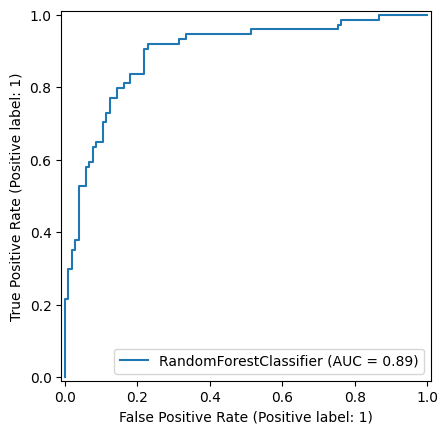

In [96]:
# Plot the ROC curve for the best model
RocCurveDisplay.from_estimator(best_model, X_test, y_test)